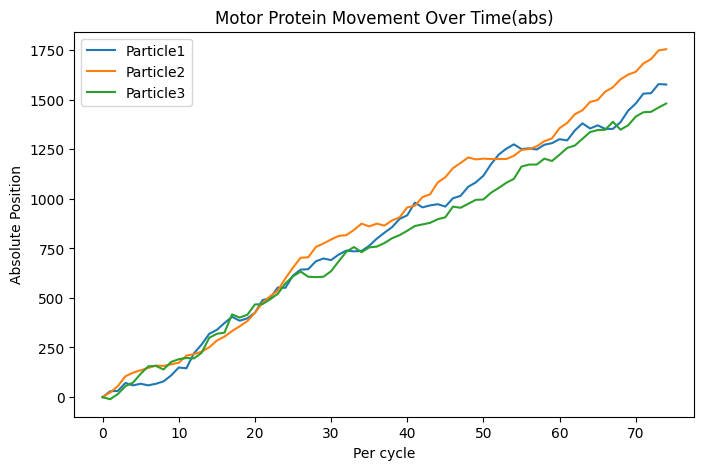

Biased phase: p_right: 0.55, p_left: 0.44999999999999996
Unbiased phase: p_right: 0.5


In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Set parameters
h = 1 #step length

#Grid and time setup
Tp = 200 #time period before switching potential
Nx = 100 #steps per potential periods
total_positions = 2 * Nx #Full x-axis range (200 positions)
num_cycles = 75 #number of cycles
one_cycle = 2 * Tp #time for one cycle
Np = 3 #number of particles
Total_steps = num_cycles * one_cycle #total time steps = 30000

#Ratchet effect parameters
alpha = 0.1 #Bias in movement 
beta_k = 1000 #strength of potential

#probability of moving right or left
p_stay=0.33 
p_right_biased = 0.33 #probability of moving right
p_left_biased = 1- (p_stay+p_right_biased) #probablity of moving left

#Initial position of particles
X = np.zeros(Np, dtype=int) #this creates an array where all particles are at X= 0
absolute_X = np.zeros((Total_steps,Np), dtype=int) #Absolute position
positions_over_time = np.zeros((num_cycles, Np), dtype=int) #array to store positions of particles over time

temp_X = np.zeros(Np, dtype=int)

#run simulation 
step = 0

def sawtooth_wave(x, alpha, beta_k):
    return beta_k * (x/alpha* Nx)

for cycle in range(Total_steps): #loops over the number of time steps = 30000
    for t in range(Tp): #loops over the time period of one cycle = 400
        random_values = np.random.rand(Np) #generates NP random values
        move_left = np.where(random_values < p_left_biased, -1, 0) #moves particles roght or left based on the condition
        move_right = np.where(random_values < p_right_biased, 1, 0)
        move= move_left + move_right
        X = (X+move)% total_positions #apply periodic boundary conditions
        temp_X+=move
        absolute_X[step,:] = temp_X #track absolute mpovement without boundary
        step+=1



    for t in range(Tp):
        random_values = np.random.rand(Np)
        move_right= np.where(random_values < p_right_biased, 1, 0)
        move_left = np.where(random_values < p_left_biased, -1, 0) 
        move= move_left + move_right
        X = (X+move)% total_positions 
        temp_X+=move
        absolute_X[step,:] = temp_X #track absolute mpovement without boundary
        step+=1

    

    positions_over_time[cycle, :] =  X #stores positions of particles over time


plt.figure(figsize = (8,5))
for i in range(min(Np, 3)):
    plt.plot(np.arange(num_cycles), absolute_X[::one_cycle, i], label=f"Particle{i+1}")
plt.xlabel("Per cycle")
plt.ylabel("Absolute Position")
plt.title("Motor Protein Movement Over Time(abs)")
plt.legend()
plt.show()

print(f"Biased phase: p_right: {p_right_biased}, p_left: {p_left_biased}")
print(f"Unbiased phase: p_right: {p_right_flat}")

In [ ]:
for cycle in range(num_cycles): #loops over the number of cycles=75
    for t in range(Tp): #loops over the time period of one cycle = 400
        random_values = np.random.rand(Np) #generates NP random values
        move = np.where(random_values < p_right_flat, 1, -1) #moves particles roght or left based on the condition
        X = (X+move)% total_positions #apply periodic boundary conditions
        temp_X+=move
        absolute_X[step,:] = temp_X #track absolute mpovement without boundary
        step+=1


    for t in range(Tp):
        random_values = np.random.rand(Np)
        move = np.where(random_values < p_right_biased, 1, -1)
        X = (X+move)% total_positions 
        temp_X+=move
        absolute_X[step,:] = temp_X #track absolute mpovement without boundary
        step+=1
